In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('orderbook.csv')
df = df[536:]
df = df.drop_duplicates('timestamp', keep='first')
df = df.reset_index(drop = True)

df['b_a_spread'] = df['BINANCE_BTC-USDT_ask_1'] - df['BINANCE_BTC-USDT_bid_1']
df = df.loc[df['b_a_spread']>0]


Time = df['timestamp']

Date_Time = Time
Date_Time = pd.to_numeric(Date_Time, errors='coerce')
Date_Time = pd.to_datetime(Date_Time, unit = 'ms')

#------------------------------------------------------------------------------


df['b12'] = df['BINANCE_BTC-USDT_bid_1'] - df['BINANCE_BTC-USDT_bid_2']
df['b13'] = df['BINANCE_BTC-USDT_bid_1'] - df['BINANCE_BTC-USDT_bid_3']
df['b14'] = df['BINANCE_BTC-USDT_bid_1'] - df['BINANCE_BTC-USDT_bid_4']

df['aten1'] = df['BINANCE_BTC-USDT_ask_1'] - df['BINANCE_BTC-USDT_ask_2']
df['aten2'] = df['BINANCE_BTC-USDT_ask_1'] - df['BINANCE_BTC-USDT_ask_3']
df['aten3'] = df['BINANCE_BTC-USDT_ask_1'] - df['BINANCE_BTC-USDT_ask_4']

Total_P_ask = df['BINANCE_BTC-USDT_ask_1']+df['BINANCE_BTC-USDT_ask_10']+df['BINANCE_BTC-USDT_ask_2']+df['BINANCE_BTC-USDT_ask_3']+df['BINANCE_BTC-USDT_ask_4']+df['BINANCE_BTC-USDT_ask_5']+df['BINANCE_BTC-USDT_ask_6']+df['BINANCE_BTC-USDT_ask_7']+df['BINANCE_BTC-USDT_ask_8']+df['BINANCE_BTC-USDT_ask_9']
Total_P_bid = df['BINANCE_BTC-USDT_bid_1']+df['BINANCE_BTC-USDT_bid_10']+df['BINANCE_BTC-USDT_bid_2']+df['BINANCE_BTC-USDT_bid_3']+df['BINANCE_BTC-USDT_bid_4']+df['BINANCE_BTC-USDT_bid_5']+df['BINANCE_BTC-USDT_bid_6']+df['BINANCE_BTC-USDT_bid_7']+df['BINANCE_BTC-USDT_bid_8']+df['BINANCE_BTC-USDT_bid_9']

Total_V_ask = df['BINANCE_BTC-USDT_askq_1']+df['BINANCE_BTC-USDT_askq_10']+df['BINANCE_BTC-USDT_askq_2']+df['BINANCE_BTC-USDT_askq_3']+df['BINANCE_BTC-USDT_askq_4']+df['BINANCE_BTC-USDT_askq_5']+df['BINANCE_BTC-USDT_askq_6']+df['BINANCE_BTC-USDT_askq_7']+df['BINANCE_BTC-USDT_askq_8']+df['BINANCE_BTC-USDT_askq_9']
Total_V_bid = df['BINANCE_BTC-USDT_bidq_1']+df['BINANCE_BTC-USDT_bidq_10']+df['BINANCE_BTC-USDT_bidq_2']+df['BINANCE_BTC-USDT_bidq_3']+df['BINANCE_BTC-USDT_bidq_4']+df['BINANCE_BTC-USDT_bidq_5']+df['BINANCE_BTC-USDT_bidq_6']+df['BINANCE_BTC-USDT_bidq_7']+df['BINANCE_BTC-USDT_bidq_8']+df['BINANCE_BTC-USDT_bidq_9']

df['mid_p_Y'] = (df['BINANCE_BTC-USDT_ask_1'] + df['BINANCE_BTC-USDT_bid_1']) / 2

df['acc_diff_P'] = Total_P_ask - Total_P_bid
df['acc_diff_v'] = Total_V_ask - Total_V_bid
df['mean_P_ask'] = Total_P_ask / 10
df['mean_P_bid'] = Total_P_bid / 10
df['mean_V_ask'] = Total_V_ask / 10
df['mean_V_bid'] = Total_V_bid / 10

#------------------------------------------------------------------------------

Past_ticks = 1000
Fut_ticks = 100

# Return calculated w.r.t. future values
df['mid_P_future'] = df['mid_p_Y'].shift(-Fut_ticks)
df['ask_P_future'] = df['BINANCE_BTC-USDT_ask_1'].shift(-Fut_ticks)
df['askq_future'] = df['BINANCE_BTC-USDT_askq_1'].shift(-Fut_ticks)
df = df[:-Fut_ticks]
#df['Ret'] = (df['ask_P_future'] * df['askq_future']) / (df['BINANCE_BTC-USDT_bid_1'] * df['BINANCE_BTC-USDT_bidq_1']) - 1
df['Ret'] = df['ask_P_future'] / df['BINANCE_BTC-USDT_bid_1'] - 1

df['Ret'] = df['Ret'] * 10000

# Slope calculated w.r.t. past values
df['mid_P_past'] = df['mid_p_Y'].shift(Past_ticks)
df['BINANCE_BTC-USDT_bid_1_past'] = df['BINANCE_BTC-USDT_bid_1'].shift(Past_ticks)
df['BINANCE_BTC-USDT_ask_1_past'] = df['BINANCE_BTC-USDT_ask_1'].shift(Past_ticks)
df['timestamp_past'] = df['timestamp'].shift(Past_ticks)
df = df[Past_ticks:]
df = df.reset_index(drop=True)
df['time_gap'] = df['timestamp'] - df['timestamp_past'] 
df['BINANCE_BTC-USDT_bid_1_slope'] = (df['BINANCE_BTC-USDT_bid_1'] - df['BINANCE_BTC-USDT_bid_1_past']) / df['time_gap']
df['BINANCE_BTC-USDT_ask_1_slope'] = (df['BINANCE_BTC-USDT_ask_1'] - df['BINANCE_BTC-USDT_ask_1_past']) / df['time_gap']
df['mid_P_slope'] = (df['mid_p_Y'] - df['mid_P_past']) / df['time_gap']


In [8]:
col = list(df)

X_col = []
#ind = [0, 2, 44, 45, 46, 50, 68, 70, 73, 76, 78, 79, 80, 81, 82, 83]

#X_col = ['BINANCE_BTC-USDT_ask_1','BINANCE_BTC-USDT_bid_1','BINANCE_BTC-USDT_askq_1',
#         'BINANCE_BTC-USDT_bidq_1','New_Buy_Orders_No','Sum_Buy_Order_Prices',
#         'Total_Qty_Buy_Orders', 'Buy_Orders_No_Cancelled','LTP', 'b12', 'aten1', 
#         'mid_p_Y', 'acc_diff_v', 'mean_P_ask', 'mean_P_bid','mean_V_ask', 
#         'mean_V_bid', 'mid_P_future']

X_col = ['BINANCE_BTC-USDT_ask_3', 'New_Sell_Orders_No', 'Sum_Sell_Order_Prices',
         'Total_Qty_Sell_Orders', 'New_Buy_Orders_No', 'Sum_Buy_Order_Prices',
         'Sell_Orders_No_Cancelled', 'Sum_Sell_Order_Prices_Cancelled', 
         'Total_Qty_Sell_Orders_Cancelled','Buy_Orders_No_Cancelled',
         'Sum_Buy_Order_Prices_Cancelled','Total_Qty_Buy_Orders_Cancelled',
         'No_of_Trades', 'Trade_Price_Sum','trade_qty_sum', 'trade_vwap', 
         'avg_ask_vol_now', 'avg_ask_vol_old','b_a_spread', 'b12', 'b13',
         'b14', 'mid_P_future', 'ask_P_future']

df = df[:-40]

Feat = df[X_col]

Lab = df[['Ret']]


percentile = np.percentile(Lab[:-35500].values, 47)
Lab_cod = pd.DataFrame(columns = Lab.columns, index = Lab.index)
Lab_cod['Ret'] = 0
mask1 = Lab['Ret'] >= percentile 
mask2 = Lab['Ret'] <= -percentile
column_name = 'Ret'
Lab_cod.loc[mask1, column_name] = 2
Lab_cod.loc[mask2, column_name] = 1
print(Lab_cod['Ret'].value_counts())
print(percentile)


X = Feat.values
y = Lab_cod.values
y = y.reshape(-1,1)

X_train = X[:-35500, :]
y_train = y[:-35500, :]
X_test = X[-35500:, :]
y_test = y[-35500:, :]

from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train_scaled = sc_X.fit_transform(X_train)
X_test_scaled = sc_X.transform(X_test)


2    94293
0    73618
1    10207
Name: Ret, dtype: int64
3.93638797039797


In [9]:
#import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization
from keras.utils import np_utils

dummy_y = np_utils.to_categorical(y_train)

model = Sequential()

model.add(Dense(output_dim = 20, init = 'uniform', input_dim=24, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(output_dim = 16, init = 'uniform', activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(output_dim = 12, init = 'uniform', activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(output_dim = 8, init = 'uniform', input_dim=14, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(output_dim = 4, init = 'uniform', activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(output_dim = 3, init = 'uniform', activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer = 'adam', metrics=['accuracy'])


C:\Users\Anurag\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(input_dim=24, activation="relu", units=20, kernel_initializer="uniform")`
  # Remove the CWD from sys.path while we load stuff.
C:\Users\Anurag\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=16, kernel_initializer="uniform")`
  del sys.path[0]
C:\Users\Anurag\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=12, kernel_initializer="uniform")`
  app.launch_new_instance()
C:\Users\Anurag\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(input_dim=14, activation="relu", units=8, kernel_initializer="uniform")`
C:\Users\Anurag\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: UserWarning: Update you

In [10]:
history = model.fit(X_train_scaled, dummy_y, batch_size=16, validation_split = 0.2, epochs=10)
print(history.history.keys())

Train on 114094 samples, validate on 28524 samples
Epoch 1/10
114094/114094 [==============================] - 22s 195us/step - loss: 0.7557 - acc: 0.6376 - val_loss: 0.4261 - val_acc: 0.8671
Epoch 2/10
114094/114094 [==============================] - 21s 187us/step - loss: 0.4734 - acc: 0.7946 - val_loss: 0.3605 - val_acc: 0.8687
Epoch 3/10
114094/114094 [==============================] - 21s 183us/step - loss: 0.4353 - acc: 0.8231 - val_loss: 0.3088 - val_acc: 0.8858
Epoch 4/10
114094/114094 [==============================] - 20s 178us/step - loss: 0.4275 - acc: 0.8262 - val_loss: 0.3430 - val_acc: 0.8676
Epoch 5/10
114094/114094 [==============================] - 20s 172us/step - loss: 0.4142 - acc: 0.8296 - val_loss: 0.3515 - val_acc: 0.8653
Epoch 6/10
114094/114094 [==============================] - 22s 193us/step - loss: 0.3984 - acc: 0.8379 - val_loss: 0.5736 - val_acc: 0.8490
Epoch 7/10
114094/114094 [==============================] - 28s 242us/step - loss: 0.3973 - acc: 0.8377

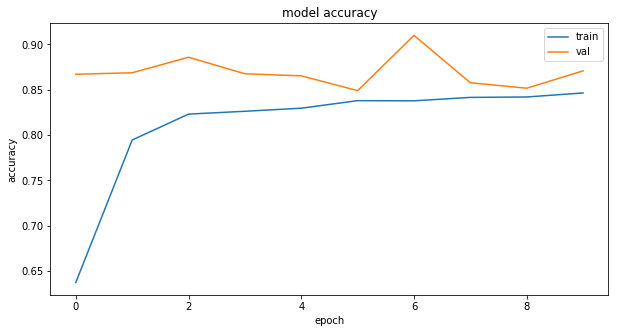

In [11]:
plt.figure(figsize = (10,5))
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'])
plt.show()

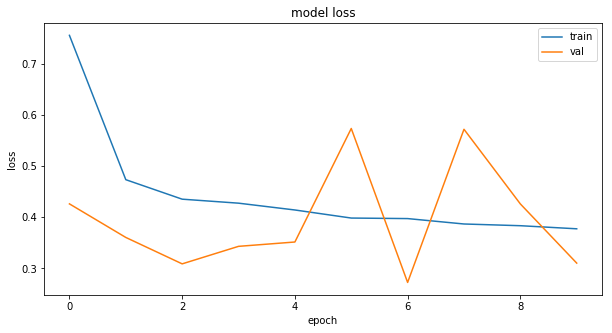

In [12]:
plt.figure(figsize = (10,5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.show()

In [13]:

predictions = model.predict(X_test_scaled)
result = np.argmax(predictions,axis=1)

ResDF = df[['BINANCE_BTC-USDT_bid_1', 'BINANCE_BTC-USDT_ask_1']][-35500:]
ResDF = ResDF.reset_index(drop=True)
ResDF['Predicted'] = result
ResDF['Real'] = y_test

#print(ResDF['result'].value_counts())

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, ResDF['Predicted'])

Infer = []
for i in range(len(ResDF)):
    if ResDF['Predicted'][i] == 2 and ResDF['Real'][i] == 2:
        Infer.append("True Positive")
    elif ResDF['Predicted'][i] == 1 and ResDF['Real'][i] == 1:
        Infer.append("True Negative")
    else:
        Infer.append("Other")

ResDF["Infer"] = Infer
Tru_pos = ResDF[ResDF['Infer'] == 'True Positive']
Tru_neg = ResDF[ResDF['Infer'] == 'True Negative']



# TRADING:  Sell-Buy alternatively (considering Qty)

In [30]:
##==============================  ====================================================

Real_time_feat = df[['timestamp','BINANCE_BTC-USDT_ask_1', 'BINANCE_BTC-USDT_askq_1','BINANCE_BTC-USDT_bid_1','BINANCE_BTC-USDT_bidq_1']][-35500:]
Real_time_feat = Real_time_feat.reset_index(drop = True)
Record = pd.DataFrame(columns = ['timestamp','Top_Bid_Price', 'Top_Ask_Price','Top_Bid_Qty','Top_Ask_Qty','Action', 'Net_Profit', 'Shares_holding'])

Bid = []
Ask = []
bidQ = []
askQ = []
Action = []
Profit = []
Shares = []
time = []
cur_pro = 0
stake = 0
bought = False

for var in range(len(Real_time_feat)):
    
    # Buying
    if result[var] == 2 and bought == False:
        Bid.append(Real_time_feat['BINANCE_BTC-USDT_bid_1'][var])
        Ask.append((Real_time_feat['BINANCE_BTC-USDT_ask_1'][var]))
        bidQ.append(Real_time_feat['BINANCE_BTC-USDT_bidq_1'][var])
        askQ.append((Real_time_feat['BINANCE_BTC-USDT_askq_1'][var]))
        Action.append('Bought')
        cur_pro -= (Real_time_feat['BINANCE_BTC-USDT_bid_1'][var] * Real_time_feat['BINANCE_BTC-USDT_bidq_1'][var])
        stake += Real_time_feat['BINANCE_BTC-USDT_bidq_1'][var]
        Profit.append(cur_pro)
        Shares.append(stake)
        time.append(Real_time_feat['timestamp'][var])
        bought = True
    
    # Selling
    elif result[var] == 1 and bought == True and stake >= Real_time_feat['BINANCE_BTC-USDT_askq_1'][var]:
        Bid.append(Real_time_feat['BINANCE_BTC-USDT_bid_1'][var])
        Ask.append((Real_time_feat['BINANCE_BTC-USDT_ask_1'][var]))
        bidQ.append(Real_time_feat['BINANCE_BTC-USDT_bidq_1'][var])
        askQ.append((Real_time_feat['BINANCE_BTC-USDT_askq_1'][var]))
        Action.append('Sold')
        cur_pro += (Real_time_feat['BINANCE_BTC-USDT_ask_1'][var] * Real_time_feat['BINANCE_BTC-USDT_askq_1'][var])
        stake -= Real_time_feat['BINANCE_BTC-USDT_askq_1'][var]
        Profit.append(cur_pro)
        Shares.append(stake)
        time.append(Real_time_feat['timestamp'][var])
        bought = False


Record['Top_Bid_Price'] = Bid
Record['Top_Ask_Price'] = Ask
Record['Top_Bid_Qty'] = bidQ
Record['Top_Ask_Qty'] = askQ
Record['Action'] = Action
Record['Net_Profit'] = Profit
Record['timestamp'] = time
Record['Shares_holding'] = Shares

In [31]:
Record.head()

,timestamp,Top_Bid_Price,Top_Ask_Price,Top_Bid_Qty,Top_Ask_Qty,Action,Net_Profit,Shares_holding
0,1209823381971,62325,62345,42,123,Bought,-2617650,42
1,1209823402642,62355,62360,35,1,Sold,-2555290,41
2,1209823413870,62290,62330,1,516,Bought,-2617580,42
3,1209823636893,62605,62645,238,25,Sold,-1051455,17
4,1209823642296,62565,62590,100,520,Bought,-7307955,117


In [32]:
Record.tail()

,timestamp,Top_Bid_Price,Top_Ask_Price,Top_Bid_Qty,Top_Ask_Qty,Action,Net_Profit,Shares_holding
70,1209828429929,62735,62770,382,919,Bought,-60897260,979
71,1209828453950,62750,62770,453,579,Sold,-24553430,400
72,1209828460017,62710,62730,130,286,Bought,-32705730,530
73,1209828553031,62800,62840,50,25,Sold,-31134730,505
74,1209828564598,62770,62775,114,1990,Bought,-38290510,619


# TRADING Buy-Sell as they come (considering Qty)

In [33]:
Real_time_feat = df[['timestamp','BINANCE_BTC-USDT_ask_1', 'BINANCE_BTC-USDT_askq_1','BINANCE_BTC-USDT_bid_1','BINANCE_BTC-USDT_bidq_1']][-35500:]
Real_time_feat = Real_time_feat.reset_index(drop = True)
Record1 = pd.DataFrame(columns = ['timestamp','Top_Bid_Price', 'Top_Ask_Price','Top_Bid_Qty','Top_Ask_Qty','Action', 'Net_Profit', 'Shares_holding'])

Bid = []
Ask = []
bidQ = []
askQ = []
Action = []
Profit = []
Shares = []
time = []
cur_pro = 0
stake = 0

for var in range(len(Real_time_feat)):
    
    # Buying
    if result[var] == 2:
        Bid.append(Real_time_feat['BINANCE_BTC-USDT_bid_1'][var])
        Ask.append((Real_time_feat['BINANCE_BTC-USDT_ask_1'][var]))
        bidQ.append(Real_time_feat['BINANCE_BTC-USDT_bidq_1'][var])
        askQ.append((Real_time_feat['BINANCE_BTC-USDT_askq_1'][var]))
        Action.append('Bought')
        cur_pro -= (Real_time_feat['BINANCE_BTC-USDT_bid_1'][var] * Real_time_feat['BINANCE_BTC-USDT_bidq_1'][var])
        stake += Real_time_feat['BINANCE_BTC-USDT_bidq_1'][var]
        Profit.append(cur_pro)
        Shares.append(stake)
        time.append(Real_time_feat['timestamp'][var])
    
    # Selling
    elif result[var] == 1 and stake >= Real_time_feat['BINANCE_BTC-USDT_askq_1'][var]:
        Bid.append(Real_time_feat['BINANCE_BTC-USDT_bid_1'][var])
        Ask.append((Real_time_feat['BINANCE_BTC-USDT_ask_1'][var]))
        bidQ.append(Real_time_feat['BINANCE_BTC-USDT_bidq_1'][var])
        askQ.append((Real_time_feat['BINANCE_BTC-USDT_askq_1'][var]))
        Action.append('Sold')
        cur_pro += (Real_time_feat['BINANCE_BTC-USDT_ask_1'][var] * Real_time_feat['BINANCE_BTC-USDT_askq_1'][var])
        stake -= Real_time_feat['BINANCE_BTC-USDT_askq_1'][var]
        Profit.append(cur_pro)
        Shares.append(stake)
        time.append(Real_time_feat['timestamp'][var])


Record1['Top_Bid_Price'] = Bid
Record1['Top_Ask_Price'] = Ask
Record1['Top_Bid_Qty'] = bidQ
Record1['Top_Ask_Qty'] = askQ
Record1['Action'] = Action
Record1['Net_Profit'] = Profit
Record1['timestamp'] = time
Record1['Shares_holding'] = Shares


In [34]:
Record1.head()

,timestamp,Top_Bid_Price,Top_Ask_Price,Top_Bid_Qty,Top_Ask_Qty,Action,Net_Profit,Shares_holding
0,1209823381971,62325,62345,42,123,Bought,-2617650,42
1,1209823381972,62325,62355,42,100,Bought,-5235300,84
2,1209823381973,62325,62355,42,100,Bought,-7852950,126
3,1209823381974,62325,62355,42,100,Bought,-10470600,168
4,1209823381996,62325,62355,42,100,Bought,-13088250,210


In [35]:
Record1.tail()

,timestamp,Top_Bid_Price,Top_Ask_Price,Top_Bid_Qty,Top_Ask_Qty,Action,Net_Profit,Shares_holding
20015,1209828575861,62770,62775,189,1621,Bought,-309163614645,4935959
20016,1209828576501,62770,62775,189,1521,Bought,-309175478175,4936148
20017,1209828576627,62770,62775,189,1521,Bought,-309187341705,4936337
20018,1209828576775,62770,62775,189,1521,Bought,-309199205235,4936526
20019,1209828577630,62770,62775,164,1516,Bought,-309209499515,4936690


# TRADING: Sell-Buy alternatively (ignoring Qty)

In [69]:
Real_time_feat = df[['timestamp','BINANCE_BTC-USDT_ask_1','BINANCE_BTC-USDT_bid_1']][-35500:]
Real_time_feat = Real_time_feat.reset_index(drop = True)
Record2 = pd.DataFrame(columns = ['timestamp','Top_Bid_Price', 'Top_Ask_Price','Action', 'Net_Profit',
                                  'Position', 'TradQ', 'Cash', 'Shar_Amt'])

Bid = []
Ask = []
Action = []
Profit = []
Shares = []
time = []
cur_pro = 0
bought = False
pos = []
r=0
tradq = []

mon = 0
shr = 0

Cash = []
Share_Amt = []
fir = 0
for var in range(len(Real_time_feat)):
    
    # Buying
    if result[var] == 2 and bought == False:
        Bid.append(Real_time_feat['BINANCE_BTC-USDT_bid_1'][var])
        Ask.append((Real_time_feat['BINANCE_BTC-USDT_ask_1'][var]))
        Action.append('Bought')
        cur_pro -= (Real_time_feat['BINANCE_BTC-USDT_ask_1'][var])
        Profit.append(cur_pro)
        time.append(Real_time_feat['timestamp'][var])
        bought = True
        pos.append(1)
        if r==0:
            shr = 1
            r=1
        else:
            r=r-1
            shr += 1
        tradq.append(r)
        
        Share_Amt.append(shr*Real_time_feat['BINANCE_BTC-USDT_ask_1'][var])
        
        mon -= Real_time_feat['BINANCE_BTC-USDT_ask_1'][var]
        
        Cash.append(mon)
        
    
    # Selling
    elif result[var] == 1 and bought == True:
        Bid.append(Real_time_feat['BINANCE_BTC-USDT_bid_1'][var])
        Ask.append((Real_time_feat['BINANCE_BTC-USDT_ask_1'][var]))
        Action.append('Sold')
        cur_pro += (Real_time_feat['BINANCE_BTC-USDT_bid_1'][var])
        Profit.append(cur_pro)
        time.append(Real_time_feat['timestamp'][var])
        bought = False
        pos.append(-1)
        r=r+1
        tradq.append(r)
        mon += Real_time_feat['BINANCE_BTC-USDT_bid_1'][var]
        Cash.append(mon)
        shr -= 1
        Share_Amt.append(shr*Real_time_feat['BINANCE_BTC-USDT_ask_1'][var])
        


Record2['Top_Bid_Price'] = Bid
Record2['Top_Ask_Price'] = Ask
Record2['Action'] = Action
Record2['Net_Profit'] = Profit
Record2['timestamp'] = time
Record2['Position'] = pos
Record2['TradQ'] = tradq

Record2['Cash'] = Cash
Record2['Shar_Amt'] = Share_Amt

In [70]:
Record2.head(60)

,timestamp,Top_Bid_Price,Top_Ask_Price,Action,Net_Profit,Position,TradQ,Cash,Shar_Amt
0,1209823381971,62325,62345,Bought,-62345,1,1,-62345,62345
1,1209823397365,62365,62390,Sold,20,-1,2,20,0
2,1209823413870,62290,62330,Bought,-62310,1,1,-62310,62330
3,1209823636893,62605,62645,Sold,295,-1,2,295,0
4,1209823642296,62565,62590,Bought,-62295,1,1,-62295,62590
5,1209823778197,62765,62795,Sold,470,-1,2,470,0
6,1209823785064,62735,62785,Bought,-62315,1,1,-62315,62785
7,1209823800758,62755,62770,Sold,440,-1,2,440,0
8,1209823818796,62680,62715,Bought,-62275,1,1,-62275,62715
9,1209823829123,62670,62680,Sold,395,-1,2,395,0


In [66]:
Record2.tail()

,timestamp,Top_Bid_Price,Top_Ask_Price,Action,Net_Profit,Position,TradQ,Cash,Shar_Amt
72,1209828460017,62710,62730,Bought,-61515,1,1,2382660,62730
73,1209828553031,62800,62840,Sold,1285,-1,2,2382660,0
74,1209828564598,62770,62775,Bought,-61490,1,1,2382660,62775
75,1209828570663,62770,62775,Sold,1280,-1,2,2382660,0
76,1209828572967,62770,62775,Bought,-61495,1,1,2382660,62775


# TRADING Buy-Sell as they come (ignoring Qty)

In [39]:
Real_time_feat = df[['timestamp','BINANCE_BTC-USDT_ask_1','BINANCE_BTC-USDT_bid_1']][-35500:]
Real_time_feat = Real_time_feat.reset_index(drop = True)
Record3 = pd.DataFrame(columns = ['timestamp','Top_Bid_Price', 'Top_Ask_Price','Action', 'Net_Profit'])

Bid = []
Ask = []
Action = []
Profit = []
time = []
cur_pro = 0

for var in range(len(Real_time_feat)):
    
    # Buying
    if result[var] == 2:
        Bid.append(Real_time_feat['BINANCE_BTC-USDT_bid_1'][var])
        Ask.append((Real_time_feat['BINANCE_BTC-USDT_ask_1'][var]))
        Action.append('Bought')
        cur_pro -= (Real_time_feat['BINANCE_BTC-USDT_bid_1'][var])
        Profit.append(cur_pro)
        time.append(Real_time_feat['timestamp'][var])
    
    # Selling
    elif result[var] == 1:
        Bid.append(Real_time_feat['BINANCE_BTC-USDT_bid_1'][var])
        Ask.append((Real_time_feat['BINANCE_BTC-USDT_ask_1'][var]))
        Action.append('Sold')
        cur_pro += (Real_time_feat['BINANCE_BTC-USDT_ask_1'][var])
        Profit.append(cur_pro)
        time.append(Real_time_feat['timestamp'][var])


Record3['Top_Bid_Price'] = Bid
Record3['Top_Ask_Price'] = Ask
Record3['Action'] = Action
Record3['Net_Profit'] = Profit
Record3['timestamp'] = time

In [40]:
Record3.head()

,timestamp,Top_Bid_Price,Top_Ask_Price,Action,Net_Profit
0,1209823381971,62325,62345,Bought,-62325
1,1209823381972,62325,62355,Bought,-124650
2,1209823381973,62325,62355,Bought,-186975
3,1209823381974,62325,62355,Bought,-249300
4,1209823381996,62325,62355,Bought,-311625


In [41]:
Record3.tail()

,timestamp,Top_Bid_Price,Top_Ask_Price,Action,Net_Profit
20015,1209828575861,62770,62775,Bought,-1086293095
20016,1209828576501,62770,62775,Bought,-1086355865
20017,1209828576627,62770,62775,Bought,-1086418635
20018,1209828576775,62770,62775,Bought,-1086481405
20019,1209828577630,62770,62775,Bought,-1086544175
